In [2]:
using QuantumOptics
using PyPlot

Starting Frequency Sweep...


┌ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this message.
└ @ QuantumOptics C:\Users\Vedant\.julia\packages\QuantumOptics\QPmtz\src\spectralanalysis.jl:71
┌ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this message.
└ @ QuantumOptics C:\Users\Vedant\.julia\packages\QuantumOptics\QPmtz\src\spectralanalysis.jl:71
┌ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possible, it might be faster to do `eigenstates(dense(op))`. Set `info=false` to turn off this message.
└ @ QuantumOptics C:\Users\Vedant\.julia\packages\QuantumOptics\QPmtz\src\spectralanalysis.jl:71
┌ Info: Defaulting to sparse diagonalization for sparse operator. If storing the full operator is possi

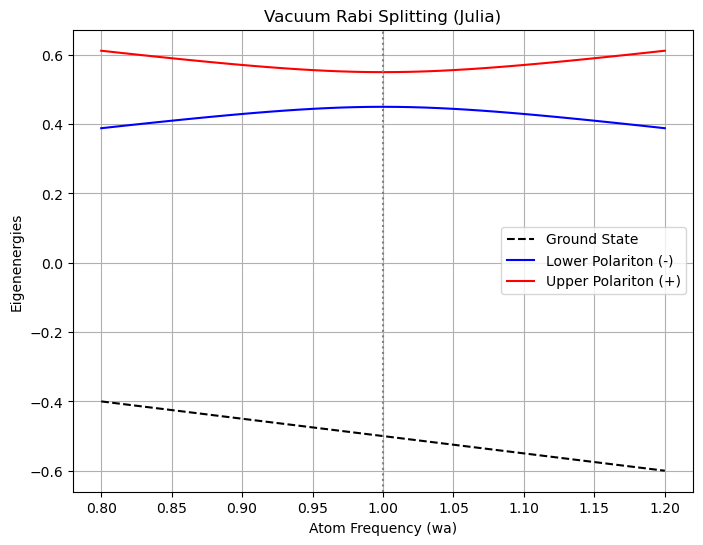

In [3]:
# Parameters
N_cutoff = 10
ω_c = 1.0
g_coup = 0.05

b_cav = FockBasis(N_cutoff)
b_atom = SpinBasis(1//2)

a = destroy(b_cav) ⊗ one(b_atom)
sm = one(b_cav) ⊗ sigmam(b_atom)
sz = one(b_cav) ⊗ sigmaz(b_atom)
n_cav = a' * a

wa_list = [0.8:0.01:1.2;]

# Prepare empty arrays to store energies
E0 = Float64[] # Ground state
E1 = Float64[] # Lower Polariton
E2 = Float64[] # Upper Polariton

println("Starting Frequency Sweep...")

for wa in wa_list
    H = ω_c * n_cav + 0.5 * wa * sz + g_coup * (a' * sm + a * sm')
    
    # Diagonalize the Hamiltonian
    evals = eigenenergies(H)
    
    push!(E0, evals[1])
    push!(E1, evals[2])
    push!(E2, evals[3])
end

# Plotting 
figure(figsize=(8, 6))

plot(wa_list, E0, "k--", label="Ground State")
plot(wa_list, E1, "b-", label="Lower Polariton (-)")
plot(wa_list, E2, "r-", label="Upper Polariton (+)")

# Vertical line at resonance
axvline(x=1.0, color="gray", linestyle=":")

xlabel("Atom Frequency (wa)")
ylabel("Eigenenergies")
title("Vacuum Rabi Splitting (Julia)")
legend()
grid(true)
display(gcf())